In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, 
                                   StandardScaler, PolynomialFeatures)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split, GridSearchCV, 
                                     cross_val_score, StratifiedKFold)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('https://www.dropbox.com/s/62xm9ymoaunnfg6/bank-full.csv?dl=1', sep=';')
df.head()

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
2,39,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41188 non-null  int64  
 1   Работа                              41188 non-null  object 
 2   Семейный статус                     41188 non-null  object 
 3   Образование                         41188 non-null  object 
 4   Кредитный дефолт                    41188 non-null  object 
 5   Ипотека                             41188 non-null  object 
 6   Займ                                41188 non-null  object 
 7   Контакт                             41188 non-null  object 
 8   Месяц                               41188 non-null  object 
 9   День недели                         41188 non-null  object 
 10  Длительность                        41188 non-null  int64  
 11  Кампания                            41188

In [42]:
df = df.drop_duplicates()
df.shape

(41176, 21)

In [43]:
df.select_dtypes(include='object').columns

Index(['Работа', 'Семейный статус', 'Образование', 'Кредитный дефолт',
       'Ипотека', 'Займ', 'Контакт', 'Месяц', 'День недели', 'Доходность',
       'y'],
      dtype='object')

In [44]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == "object"]
numerical_columns = [c for c in df.columns if df[c].dtype.name != "object"]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Работа', 'Семейный статус', 'Образование', 'Кредитный дефолт', 'Ипотека', 'Займ', 'Контакт', 'Месяц', 'День недели', 'Доходность', 'y']
numerical_columns: ['Возраст', 'Длительность', 'Кампания', 'День', 'Предыдущий контакт', 'Колебание уровня безработицы', 'Индекс потребительских цен', 'Индекс потребительской уверенности', 'Европейская межбанковская ставка', 'Количество сотрудников в компании']


In [45]:
Cat_col = ['Работа', 'Семейный статус', 'Образование', 'Кредитный дефолт', 'Ипотека', 'Займ', 'Контакт', 'Месяц', 'День недели', 'Доходность']

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Возраст,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
Длительность,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
Кампания,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
День,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
Предыдущий контакт,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
Колебание уровня безработицы,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
Индекс потребительских цен,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
Индекс потребительской уверенности,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
Европейская межбанковская ставка,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
Количество сотрудников в компании,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [47]:
df[Cat_col].describe().T

,count,unique,top,freq
Работа,41176,11,Менеджер,13343
Семейный статус,41176,4,Женат / замужем,24921
Образование,41176,8,Университетская степень,12164
Кредитный дефолт,41176,3,Нет,32577
Ипотека,41176,3,Да,21571
Займ,41176,3,Нет,33938
Контакт,41176,2,Сотовый телефон,26135
Месяц,41176,10,Май,13767
День недели,41176,5,Четверг,8618
Доходность,41176,3,Отсутствует,35551


**Preprocessing**

In [48]:
encoder = LabelEncoder() 
df['y']=encoder.fit_transform(df['y'])

In [49]:
X_col = ['Возраст',	'Работа',	'Семейный статус',	'Образование',	'Кредитный дефолт',
         'Ипотека',	'Займ',	'Контакт',	'Месяц',	'День недели',	'Длительность',	'Кампания',	'День',	
         'Предыдущий контакт',	'Доходность',	'Колебание уровня безработицы',	'Индекс потребительских цен',
         'Индекс потребительской уверенности',	'Европейская межбанковская ставка',	'Количество сотрудников в компании']

y_col = ['y']
cat_features = ['Работа', 'Семейный статус', 'Образование', 'Кредитный дефолт',
       'Ипотека', 'Займ', 'Контакт', 'Месяц', 'День недели', 'Доходность']

In [50]:
for i in cat_features:
  df[i] = pd.factorize(df[i])[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41176 non-null  int64  
 1   Работа                              41176 non-null  int64  
 2   Семейный статус                     41176 non-null  int64  
 3   Образование                         41176 non-null  int64  
 4   Кредитный дефолт                    41176 non-null  int64  
 5   Ипотека                             41176 non-null  int64  
 6   Займ                                41176 non-null  int64  
 7   Контакт                             41176 non-null  int64  
 8   Месяц                               41176 non-null  int64  
 9   День недели                         41176 non-null  int64  
 10  Длительность                        41176 non-null  int64  
 11  Кампания                            41176

In [51]:
y = df['y']
X = df.drop('y', axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
X_col = X.columns
len(X_col)

20

In [54]:
pd.pivot_table(data=df, columns='y',values=df.columns)

y,0,1
Возраст,40.912266,39.910994
День,791.990946,984.109396
День недели,2.067256,1.996661
Длительность,553.256090,220.868079
Доходность,0.515844,0.126037
Европейская межбанковская ставка,2.123362,3.811482
Займ,0.193361,0.200646
Индекс потребительских цен,93.354577,93.603798
Индекс потребительской уверенности,-39.791119,-40.593232
Ипотека,0.586549,0.570107


**Traning Time**

In [55]:
tree = DecisionTreeClassifier(max_depth = 12, criterion = 'gini', 
                              random_state = 10, max_features = 20, 
                              min_samples_leaf = 1, min_samples_split = 20)
knn = KNeighborsClassifier(n_neighbors=40)
dtree = tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

print('DecisionTreeClassifier:', accuracy_score(y_test, tree.predict(X_test)))
print('KNeighborsClassifier:', accuracy_score(y_test, knn.predict(X_test)))

DecisionTreeClassifier: 0.906386595434677
KNeighborsClassifier: 0.9125789218067023


In [56]:
forest_params = {"max_depth": range(6, 21, 2), "max_features": range(4, 21, 2)}
forest = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=10)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) 

0.9139040680024287


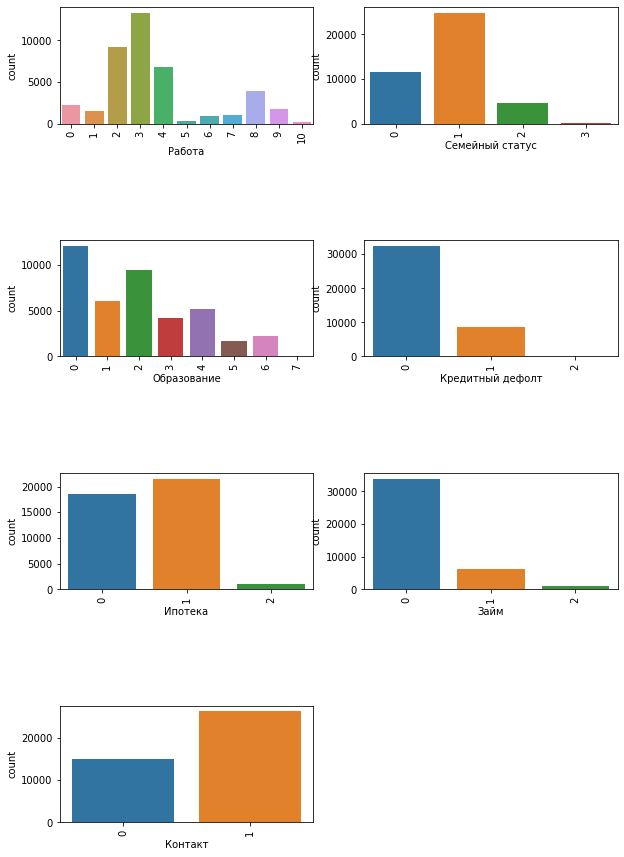

In [57]:
cols = ['Работа', 'Семейный статус', 'Образование', 'Кредитный дефолт',
        'Ипотека', 'Займ', 'Контакт']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(cols):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [59]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9174356483729966
Precision: 0.9432652516352957
Recall: 0.9651686928015298


In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Accuracy:",metrics.accuracy_score(y_test, logreg.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, logreg.predict(X_test)))
print("Recall:",metrics.recall_score(y_test, logreg.predict(X_test)))

Accuracy: 0.9122146673142302
Precision: 0.9297811360083377
Recall: 0.9748668214724764
